# Notebook es10

## 10.1

### Assignment

Choose **ONLY ONE** of the two following possibilities:

1. Parallelize with MPI libraries your Genetic Algorithm code in order to solve the TSP by performing a *Genetic Search* with (up to) 11 **parallel GA searches of the optimal path**:
each node should perform an independent GA search, the so-called *Continent*, **but** every $N_{migr}$ generations the *Continents* should exchange their best individuals randomly.

2. Starting from your Genetic Algorithm code implement a **Parallel Tempering algorithm** (Simulated Annealing with many temperatures). Parallelize with MPI libraries your algorithm in order to solve the TSP where each computing node, up to 11, is characterized by a different temperature or a limited set of temperatures (if you need more than 11 temperatures). Use your genetic operators (except crossover) as trial moves for the Metropolis algorithm and **add a trial move that proposes an exchange of paths among adjacent temperatures (nodes)** (see lecture 8 for the acceptance formula). The candidate solution of the TSP will appear on the node with the lower temperature.

### Solution

I choose the second possibility given by the assignment, so I implement a Parallel Tempering algorithm. 
I reused the ```travel``` class of exercise 9 and I implement the parallel code in the new class ```PTA_pop```. This class is characterized by a travel object, the information about the city, the beta value for the parallel tempering and the variable to indicate the rank of the processor used. 

Every processor work with a specific value for beta assigned we the system is initialized. The most important functions of this class are ```void metro_mut()``` and ```void change_val()```. 

The function ```void metro_mut()``` propose a mutation to the travel object of the class, which is accepted with a probability given by 
\begin{equation}
    P = 
    \begin{cases}
        e^{- \beta_i [L_{new} - L_{old}]} & \text{if } L_{new} > L_{old} \\
        1 & \text{otherwise}
    \end{cases}
\end{equation}
so the processor which presents an higher temperature value modify the travel object more frequently. 

Otherwise the ```void change_val()``` function propose to change the travel object between the different processor, in particular every of them receive the travel of the process with the precedent $\beta$ value with which it sobstitutes his travel candidate with a probability given by:
\begin{equation}
    P = 
    \begin{cases}
        e^{- (\beta_j - \beta_i) [L_i - L_j]} & \text{if } L_i > L_j \\
        1 & \text{otherwise}
    \end{cases}
\end{equation}

Comunication between processor allows to explore more quickly the space of possible solution. 
At the end of the simulation the class provide a function to obtain estimation for the best travel, given the travel object which belong to the processor characterize by the higher $\beta$ value. 

## 10.2

### Assignment

Apply your parallel code to the TSP problem for 110 italian "capoluoghi di provincia" longitude and latitude coordinates in the *cap_prov_ita.dat* file.

If your choice in Exercise 10.1 is option 1, do you improve with respect using the same number of computing cores but with **independent GA searches** ?

If your choice in Exercise 10.1 is option 2, by using a number of temperatures equal to the number of individuals in your **non-parallel Genetic Algorithm code**, do you "improve" with respect to it?

### Solution

I applied my code the the position given by the assignment and I obtained the travel rapresented in the figure below. I also reported the lenght of the best travel at different step of the simulation. I plot this plot together with the result obtained using GA algorith, performed with 8 individuals in the population like the number of processor used in PTA. From this plot it's evident that the PTA has the best result. Also the time used by my conputer to run the PTA is noticeably lower.  

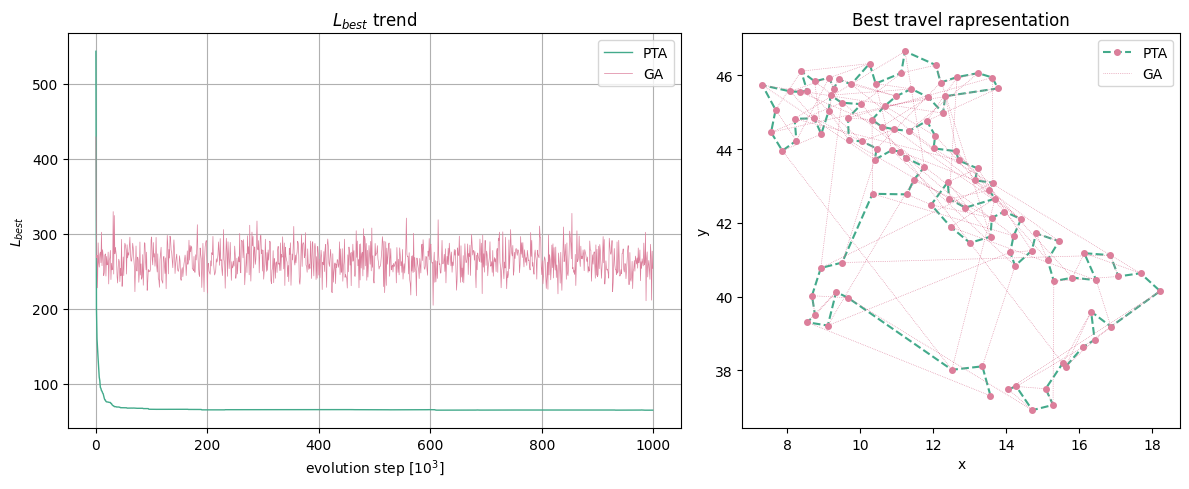

In [82]:
import numpy as np
import matplotlib.pyplot as plt

#load data
italy_data = np.loadtxt('data/10_coord.dat')
best_travel = np.loadtxt('data/best_travel.txt')
GA_coord = np.loadtxt('data/GA_coord.dat')
GA_bt = np.loadtxt('data/GA.dat')

fig, ax = plt.subplots(1, 2, figsize=(12, 5), gridspec_kw={'width_ratios': [1.4, 1]})  

#plotting the best travel lenght behaviour
ax[0].plot(best_travel[:], color='#43AA8B', lw=1, label='PTA')
ax[0].plot(GA_bt[:,1], color='#DC7F9B', lw=0.5, label='GA')
ax[0].set_xlabel(r'evolution step $[10^3]$')
ax[0].set_ylabel(r'$L_{best}$')
ax[0].set_title(r'$L_{best}$ trend')
ax[0].grid(True)
ax[0].legend()

#plotting the best travel
ax[1].plot(italy_data[:, 0], italy_data[:, 1], 'o', markersize=4, linestyle='--', color='#43AA8B', markerfacecolor="#DC7F9B", markeredgecolor="#DC7F9B", label='PTA')
#for i in range(len(italy_data)):
#    ax[1].text(italy_data[i, 0], italy_data[i, 1], str(i), fontsize=5, verticalalignment='bottom', horizontalalignment='right')
ax[1].plot(GA_coord[:,0], GA_coord[:,1], linestyle=':', color="#DC7F9B", lw=0.5, label='GA')
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')
ax[1].set_title('Best travel rapresentation')
ax[1].legend()

plt.tight_layout()
plt.show()